In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [2]:
Collision_data = pd.read_csv('NYC_accidents_heat_map.csv')
Collision_data.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/22/2017,0:00,BRONX,10453,40.861862,-73.912820,"(40.861862, -73.91282)",WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,NaN,...,Unspecified,NaN,NaN,NaN,3774361,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,10/22/2017,0:00,BROOKLYN,11211,40.714073,-73.950615,"(40.714073, -73.950615)",NaN,NaN,545 METROPOLITAN AVENUE,...,Other Vehicular,NaN,NaN,NaN,3774004,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,10/22/2017,0:00,MANHATTAN,10011,40.739136,-73.999260,"(40.739136, -73.99926)",NaN,NaN,77 7 AVENUE,...,Unspecified,NaN,NaN,NaN,3774254,TAXI,BU,NaN,NaN,NaN
3,10/22/2017,0:00,MANHATTAN,10025,40.794235,-73.962814,"(40.794235, -73.962814)",CENTRAL PARK WEST,WEST 100 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774917,TAXI,TAXI,NaN,NaN,NaN
4,10/22/2017,0:00,QUEENS,11428,40.720375,-73.732260,"(40.720375, -73.73226)",JAMAICA AVENUE,222 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774091,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [3]:
Collision_data['la'] = Collision_data['LATITUDE'].map(lambda x : round(float(x),3))
Collision_data['lo'] = Collision_data['LONGITUDE'].map(lambda x : round(float(x),3))

In [4]:
pie = pd.DataFrame(Collision_data['VEHICLE TYPE CODE 1'].value_counts())

In [5]:
pie = pie[pie['VEHICLE TYPE CODE 1']>20]

In [6]:
pie= pie.drop('UNKNOWN')
pie =pie.drop('OTHER')

In [7]:
pie.index

Index(['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'VAN',
       'PICK-UP TRUCK', 'SMALL COM VEH(4 TIRES) ',
       'LARGE COM VEH(6 OR MORE TIRES)', 'BUS', 'LIVERY VEHICLE', 'MOTORCYCLE',
       'BICYCLE', 'AMBULANCE', 'FIRE TRUCK', 'SCOOTER', 'TK', 'BU', 'DS', 'VN',
       'PEDICAB', 'CONV', 'DP'],
      dtype='object')

AttributeError: 'list' object has no attribute 'set_size'

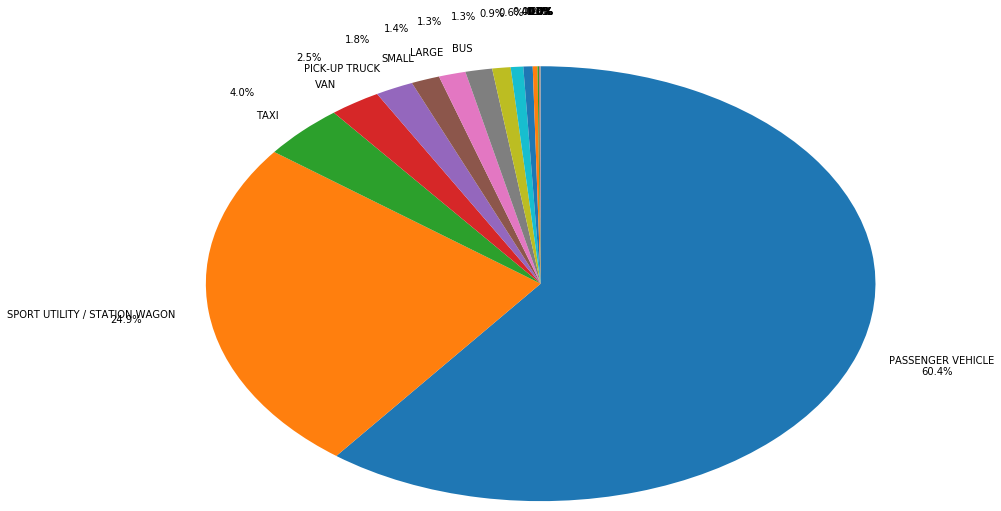

In [12]:
label = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'VAN',
        'PICK-UP TRUCK', 'SMALL',
       'LARGE', 'BUS', '', '',
       '', '', '', '', '', '', '', '','', '', '']
texts = plt.pie(pie,startangle=90,counterclock=False,labels=label,radius=2.5,autopct="%1.1f%%", pctdistance = 1.25)
for t in texts:
    t.set_size(18)

In [72]:
C=Collision_data.loc[:,['la','lo']]
C.dropna()

,la,lo
0,40.862,-73.913
1,40.714,-73.951
2,40.739,-73.999
3,40.794,-73.963
4,40.720,-73.732
6,40.685,-73.868
7,40.825,-73.867
8,40.678,-73.853
9,40.707,-73.791
10,40.697,-73.931


In [73]:
CC= pd.DataFrame(C.groupby(['la','lo']).size(),columns = {'size'})


In [74]:
CC=CC.drop(0.00)

In [75]:
CC

size
la     lo           
40.499 -74.244     2
       -74.243     1
       -74.242     1
40.500 -74.241     1
       -74.240     2
       -74.239     4
       -74.238     1
       -74.236     1
40.501 -74.249     2
       -74.243     1
       -74.241     1
40.502 -74.246     1
       -74.244     2
       -74.243     2
       -74.242     3
       -74.241     3
       -74.238     1
       -74.235     3
       -74.233     3
40.503 -74.252     4
       -74.251     3
       -74.250     1
       -74.249     3
       -74.248     1
       -74.245     1
       -74.244     1
       -74.243     3
       -74.242     1
       -74.240     2
       -74.239     2
...              ...
40.909 -73.906     2
       -73.903     1
       -73.902     2
       -73.900     1
       -73.898     1
       -73.897     5
40.910 -73.906     1
       -73.903    24
       -73.902    12
       -73.901    15
       -73.900     5
       -73.899     7
       -73.898     7
       -73.897    46
40.911 -73.907    12
       -73.905     2
       -73.902     1
       -73.900     2
       -73.899     3
       -73.898     6
       -73.897     3
40.912 -73.903    27
       -73.902     6
       -73.901     3
       -73.900     2
       -73.898     2
       -73.897     1
40.913 -73.903     7
       -73.902     1
41.126 -73.714     4

[44523 rows x 1 columns]

In [76]:
CC =CC.sample(1000)
CC.head()

,,size
la,lo,
40.581,-73.983,3
40.567,-74.132,1
40.602,-73.967,1
40.704,-73.916,18
40.705,-73.828,17


In [77]:
CC.to_csv('whole5.csv')

In [6]:
Dummy = pd.get_dummies(Collision_data['VEHICLE TYPE CODE 1'])
Dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139133 entries, 0 to 1139132
Data columns (total 67 columns):
3D                                1139133 non-null uint8
AM                                1139133 non-null uint8
AMBUL                             1139133 non-null uint8
AMBULANCE                         1139133 non-null uint8
AR                                1139133 non-null uint8
BACKH                             1139133 non-null uint8
BICYCLE                           1139133 non-null uint8
BOX T                             1139133 non-null uint8
BR                                1139133 non-null uint8
BU                                1139133 non-null uint8
BUS                               1139133 non-null uint8
CB                                1139133 non-null uint8
CM                                1139133 non-null uint8
CONV                              1139133 non-null uint8
Comme                             1139133 non-null uint8
DP                              

In [12]:
df = pd.DataFrame(Dummy.sum(),columns= {'num'})
df

,num
3D,2
AM,15
AMBUL,4
AMBULANCE,2474
AR,3
BACKH,1
BICYCLE,4877
BOX T,1
BR,2
BU,128


In [17]:
df = df[df.num>20]
df.drop('UNKNOWN',axis = 0)

,num
AMBULANCE,2474
BICYCLE,4877
BU,128
BUS,14042
CONV,36
DP,24
DS,65
FIRE TRUCK,823
LARGE COM VEH(6 OR MORE TIRES),14117
LIVERY VEHICLE,9615


In [20]:
df/df.sum() *100

,num
AMBULANCE,0.218848
BICYCLE,0.431415
BU,0.011323
BUS,1.242144
CONV,0.003185
DP,0.002123
DS,0.005750
FIRE TRUCK,0.072802
LARGE COM VEH(6 OR MORE TIRES),1.248778
LIVERY VEHICLE,0.850535
